In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
dataset = pd.read_csv('C:\\Users\\16478\\Desktop\\data_science\\LSTM\\training_data_set.csv')
dataset.head()



,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [19]:
opening_prices = dataset.iloc[:, 1:2].values
opening_prices

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
opening_prices_scaled = sc.fit_transform(opening_prices)
opening_prices_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [21]:
X_train = []
y_train = []
for i in range(30, 2035):
    X_train.append(opening_prices_scaled[i-30:i, 0])
    y_train.append(opening_prices_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [23]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=80,batch_size=32)

Epoch 1/80
63/63 [==============================] - 30s 77ms/step - loss: 0.0116
Epoch 2/80
63/63 [==============================] - 6s 91ms/step - loss: 0.0029
Epoch 3/80
63/63 [==============================] - 5s 84ms/step - loss: 0.0029
Epoch 4/80
63/63 [==============================] - 6s 89ms/step - loss: 0.0028
Epoch 5/80
63/63 [==============================] - 6s 94ms/step - loss: 0.0029
Epoch 6/80
63/63 [==============================] - 5s 84ms/step - loss: 0.0027
Epoch 7/80
63/63 [==============================] - 5s 86ms/step - loss: 0.0024
Epoch 8/80
63/63 [==============================] - 5s 77ms/step - loss: 0.0022
Epoch 9/80
63/63 [==============================] - 5s 82ms/step - loss: 0.0022
Epoch 10/80
63/63 [==============================] - 5s 87ms/step - loss: 0.0019
Epoch 11/80
63/63 [==============================] - 5s 82ms/step - loss: 0.0020
Epoch 12/80
63/63 [==============================] - 5s 79ms/step - loss: 0.0017
Epoch 13/80
63/63 [=================

In [26]:
dataset_test = pd.read_csv('C:\\Users\\16478\\Desktop\\data_science\\LSTM\\test_data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 46):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 41ms/step


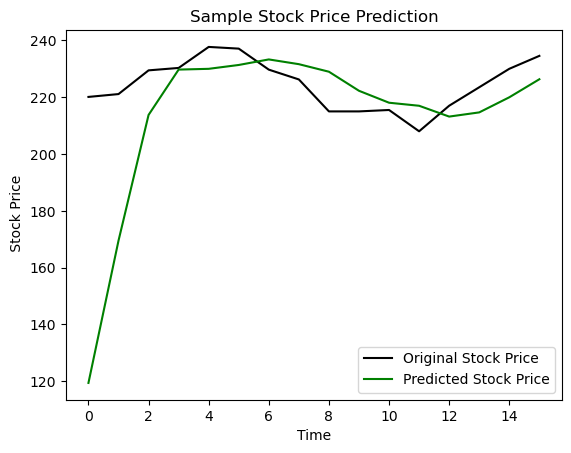

In [27]:
plt.plot(real_stock_price, color = 'black', label = 'Original Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Sample Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()